*Joel Reyes Toledo*

Universidad de La Laguna. Grado en Física, curso 2022-23

Física Computacional.

# Práctica 1

## **Implementar el polinomio interpolador mediante las formas de Lagrange y de Newton.**

*Polinomio de Lagrange:*


In [ ]:
import numpy as np
import pylab as plt

# Definition of the Lagrange interpolation polynomial
def pn(a, b, gap):
    n = len(a)
    conj = np.arange(min(a), max(a) + gap, gap) # domain of the polynomial

    prod_num = 1
    prod_den = 1

    pn_lag = 0

    for i in range(n):
        for j in range(n):
            if i !=j:
              prod_num *= (conj - a[j])
              prod_den *= (a[i]-a[j])

        termino = prod_num/prod_den
        pn_lag += b[i]*termino

        prod_den = 1
        prod_num = 1

    return [pn_lag, conj]

*Polinomio de Newton:*

In [ ]:
import numpy as np
import pylab as plt

# We define the function depending on "a" (domain), "y" (images) and the gap
# we want to set for the domain we want to study the interpolation polynomial.
def pn_new(a, y, gap):

# We create the split differences matrix
    pendientes = np.zeros((len(a), len(a)))
    pendientes[:,0]=y # first column are the images
    conj = np.arange(min(a), max(a) + gap, gap)
    pol = y[0]
    prod = 1

# For the making of of the matrix, we will construct it column per column so
# it is needed 2 iterations:
#   1 that go through all columns.
#   1 that edit each column (this iteration is inside the columns iteration).

# "k" will refere to columns and "i" to the rows
    for k in range(1, len(a)):
      for i in range(len(a)):
        if i>=k:
          pendientes[i, k] = (pendientes[i, k-1] -
                              pendientes[i-1,k-1])/(a[i] - a[i-k])

      prod *= (conj - a[k-1])
      pol += pendientes[k,k]*prod

# It is needed both polynomial and the domain of the nodes
    return [pol, conj]

**2.- A modo de ejemplo, para estudiar y analizar los procedimientos de interpolación, pueden utilizar los siguientes valores:**

| x | 1        | \-0\.75 | \-0\-5   | \-0\.25  | 0 | \.25     | 0\.5     | 0\.75    | 1        |
|:---:|:--------:|:-------:|:--------:|:--------:|:---:|:--------:|:--------:|:--------:|:--------:|
| f | 0\.03846 | 0\.06639 | 0\.13793 | 0\.39024 | 1 | 0\.39024 | 0\.13793 | 0\.06639 | 0\.03846 |



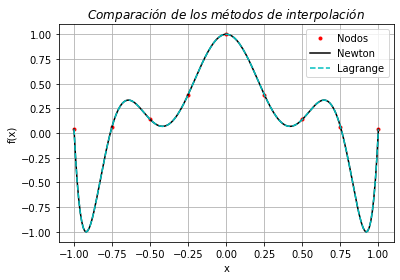

In [ ]:
# From this part it is needed to run the previous code

x = np.arange(-1, 1.25, 0.25)
f = np.array([0.03846, 0.06639, 0.13793, 0.39024, 1, 0.39024, 0.13793,
                0.06639, 0.03846])

plt.plot(x, f, "r.", label="Nodos")

plt.plot(pn_new(x, f, 0.01)[1], pn_new(x, f,0.01)[0], "k", label="Newton")
plt.plot(pn(x, f, 0.01)[1], pn(x, f, 0.01)[0], "c--", label="Lagrange")

plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$Comparación \ de \ los \ métodos \ de \ interpolación$")
plt.legend(loc="best")

**3. Presentar algún otro caso que les sea de interés y comentar los resultados obtenidos**


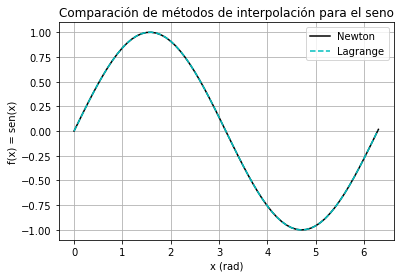

In [ ]:
# Trigonometric function: sine
def dom(minx, maxx, gap):
  dominio = np.arange(minx, maxx + gap, gap)
  return dominio, gap

def seno(a):
  fx = np.sin(a)
  return fx

plt.plot(dom(0,2*np.pi, 0.1)[0],
         pn_new(dom(0, 2*np.pi, 0.1)[0], seno(dom(0, 2*np.pi, 0.1)[0]),
            dom(0, 2*np.pi, 0.1)[1])[0], "k-", label = "Newton")

plt.plot(dom(0,2*np.pi, 0.01)[0],
         pn(dom(0, 2*np.pi, 0.01)[0], seno(dom(0, 2*np.pi, 0.01)[0]),
            dom(0, 2*np.pi, 0.01)[1])[0], "c--", label = "Lagrange")

# In this case, it has been proven that Newton interpolation method required a
# smaller gap than Lagrange interpolation to represent the curve correctly

plt.grid()

plt.xlabel("x (rad)")
plt.ylabel("f(x) = sen(x)")
plt.title("Comparación de métodos de interpolación para el seno")
plt.legend(loc = "best")

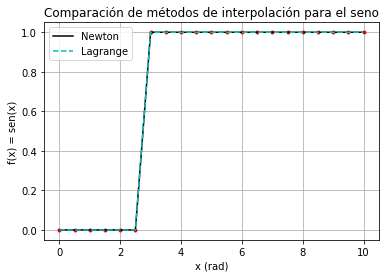

In [ ]:
# Heaviside function
def escalon(a, b):
  fx = np.array([])
  for i in range(len(a)):
    if a[i] >= b:
      fx = np.append(fx, 1)
    else:
      fx = np.append(fx, 0)
  return fx

plt.plot(dom(0, 10, 0.5)[0], escalon(dom(0, 10, 0.5)[0], 3), "r.")

plt.plot(dom(0, 10, 0.5)[0],
         pn_new(dom(0, 10, 0.5)[0], escalon(dom(0, 10, 0.5)[0], 3),
                dom(0, 10, 0.5)[1])[0], "k-", label = "Newton")

plt.plot(dom(0, 10, 0.5)[0],
         pn(dom(0, 10, 0.5)[0], escalon(dom(0, 10, 0.5)[0], 3),
            dom(0, 10, 0.5)[1])[0], "c--", label = "Lagrange")

# It doesn't represent correctly de function but it is a good aproximation
# In this case it is due these methods need a low number of nodes to work
# correctly, as it has been mentiones before.

plt.grid()

plt.xlabel("x (rad)")
plt.ylabel("f(x) = sen(x)")
plt.title("Comparación de métodos de interpolación para el seno")
plt.legend(loc = "best")

Text(0.5, 1.0, 'Fórmula general de la impedancia intrínseca en función de la  frecuencia')

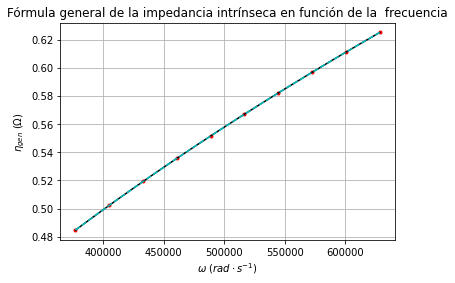

In [ ]:
# Study of intrinsic impedance of saltwater in function of the frequency of the
# electromagnetic fields

# It has to be used a range with low numbers so it doesn't exceed the limit of
# RAM that is imposed by colaboratory
f= np.linspace(60*10**3, 10**5, 10)

# Permeability
mu = np.pi*4*10**(-7)

# Permittivity
eps0 = 8.854*10**(-12)
epsr = 81
eps = epsr*eps0

c=299792458

# Conductivity
sigma = 4

# General expressions of the parameters we need:
def w(f):
    w=2*np.pi*f
    return w

def alfa_gen(w):
    alfa_g = w*(0.5*mu*eps*(((1+(sigma/(w*eps))**2)**(1/2)) -1))**(1/2)
    return alfa_g

def beta_gen(w):
    beta_g = w*(0.5*mu*eps*(np.sqrt(1+(sigma/(w*eps)))+1))**(1/2)
    return beta_g

def modulo_eta_gen(w, alfa_g, beta_g):
    m_eta_g = ((w*mu)/np.sqrt(alfa_g**2 + beta_g**2))
    return m_eta_g

w= w(f)

plt.plot(w, (modulo_eta_gen(w, alfa_gen(w), beta_gen(w))), "r.")

plt.plot((pn_new(w, modulo_eta_gen(w, alfa_gen(w), beta_gen(w)), 0.1)[1]),
         (pn_new(w, modulo_eta_gen(w, alfa_gen(w), beta_gen(w)), 0.1)[0]), "k-",
         label = "Newton")

plt.plot((pn(w, modulo_eta_gen(w, alfa_gen(w), beta_gen(w)), 0.1)[1]),
         (pn(w, modulo_eta_gen(w, alfa_gen(w), beta_gen(w)), 0.1)[0]), "c--",
         label = "Lagrange")

plt.grid()
plt.xlabel("$\omega \ (rad\cdot s^{-1})$")
plt.ylabel("$\eta_{gen} \ (\Omega)$")
plt.title("Fórmula general de la impedancia intrínseca en función de la \
 frecuencia")

**4. Comparar con algún procedimiento ya implementado en Numpy o en Scipy**

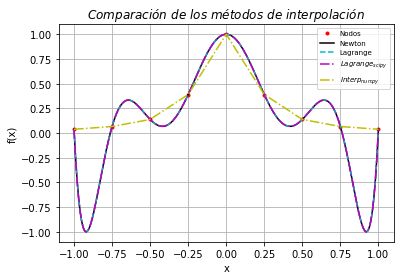

In [ ]:
from scipy.interpolate import lagrange
from scipy.interpolate import interpolate

x = np.arange(-1, 1.25, 0.25)
f = np.array([0.03846, 0.06639, 0.13793, 0.39024, 1, 0.39024, 0.13793,
                0.06639, 0.03846])

conj = np.arange(min(x), max(x) + 0.01, 0.01)

# Lagrange interpolation with scipy
p = lagrange(x, f)
p1 = p(conj)

# Command interp in numpy
p2 = np.interp(conj, x, f)

plt.plot(x, f, "r.", label = "Nodos")

plt.plot(pn_new(x, f, 0.01)[1], pn_new(x, f,0.01)[0], "k", label="Newton")
plt.plot(pn(x, f, 0.01)[1], pn(x, f, 0.01)[0], "c--", label="Lagrange")
plt.plot(conj, p(conj), "m-.", label = "$Lagrange_{scipy}$")
plt.plot(conj, p2, "y-.", label = "$Interp_{numpy}$")

# It is seem, the command from numpy is correct, the curve goes through all the
# nodes, but is not smooth.

plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$Comparación \ de \ los \ métodos \ de \ interpolación$")
plt.legend(loc="best", fontsize = 7)
